# Day two: CADD &RDkit

Author: Hazem Ahmed

In [2]:
# The majority of the basic molecular functionality is found in module rdkit.Chem
from rdkit import Chem
from rdkit.Chem import AllChem
# drawing
from rdkit.Chem import Draw
# fingerprints
from rdkit.Chem import MACCSkeys
import numpy as np
import pandas as pd

In [40]:
gefitinib = Chem.MolFromSmiles('COc1cc2c(cc1OCCCN3CCOCC3)c(ncn2)Nc4ccc(c(c4)Cl)F')
erlotinib = Chem.MolFromSmiles('COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC')
lapatinib = Chem.MolFromSmiles('CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)'
                               'N=CN=C3NC4=CC(=C(C=C4)OCC5=CC(=CC=C5)F)Cl')
afatinib = Chem.MolFromSmiles('CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OC4CCOC4')
osimertinib = Chem.MolFromSmiles('CN1C=C(C2=CC=CC=C21)C3=NC(=NC=C3)N'
                                 'C4=C(C=C(C(=C4)NC(=O)C=C)N(C)CCN(C)C)OC')

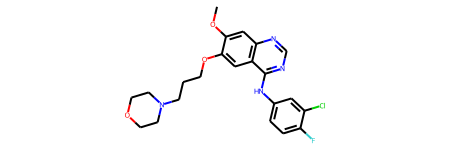

In [41]:
gefitinib

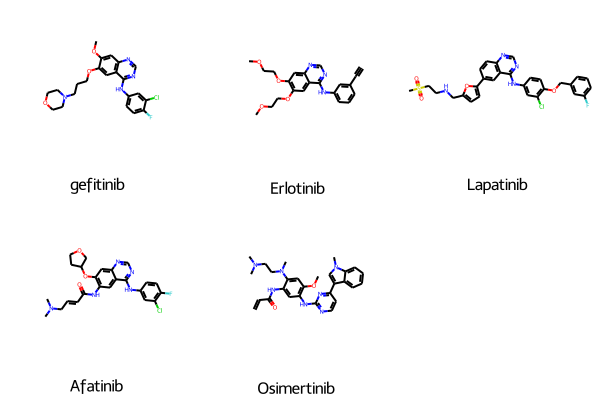

In [7]:
Draw.MolsToGridImage([gefitinib, erlotinib, lapatinib, afatinib, osimertinib],
                     legends=["gefitinib", 'erlotinib', 'lapatinib', 'afatinib', 'osimertinib'])

## Fingerprinting and Molecular Similarity
### Molecular descriptors in 1D

from rdkit.Chem import AllChem
### Morgan Fingerprints (Circular Fingerprints)
* Applying the Morgan algorithm to a set of user-supplied atom invariants
* When generating Morgan fingerprints, the radius of the fingerprint must also be provided
* Takes a radius parameter -> radius=2 == ECFP4 where 4=diameter

In [119]:
dictionary_of_molecules = {'gefitinib': gefitinib, 'Erlotinib': erlotinib, 'Lapatinib': Lapatinib,
                           'afatinib': afatinib, 'osimertinib': osimertinib}

In [131]:
# small scale trials
# morgens_dictionary = {}
# for key, value in dictionary_of_molecules.items():
#     morgens_dictionary[key+'_morgen'] = AllChem.GetMorganFingerprint(value, radius=2)
# print (morgens_dictionary)

{'gefitinib_morgen': <rdkit.DataStructs.cDataStructs.UIntSparseIntVect object at 0x7fb99f6d84e0>, 'Erlotinib_morgen': <rdkit.DataStructs.cDataStructs.UIntSparseIntVect object at 0x7fb99f8ba580>, 'Lapatinib_morgen': <rdkit.DataStructs.cDataStructs.UIntSparseIntVect object at 0x7fb99f2b0260>, 'afatinib_morgen': <rdkit.DataStructs.cDataStructs.UIntSparseIntVect object at 0x7fb99f8b81c0>, 'osimertinib_morgen': <rdkit.DataStructs.cDataStructs.UIntSparseIntVect object at 0x7fb99f8b8440>}


In [132]:
# maccs_dictionary = {}
# for key, value in dictionary_of_molecules.items():
#     maccs_dictionary[key+'_MACCS'] = MACCSkeys.GenMACCSKeys(value)
# print (maccs_dictionary)

{'gefitinib_MACCS': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fb99f2a47b0>, 'Erlotinib_MACCS': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fb99f2a4da0>, 'Lapatinib_MACCS': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fb99f2a4260>, 'afatinib_MACCS': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fb99f2a4e40>, 'osimertinib_MACCS': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fb99f2a4a80>}


In [121]:
# from rdkit import DataStructs
# from itertools import product
# S = list(combinations(morgens_dictionary.values(), 2))
# DataStructs.TanimotoSimilarity(morgens_dictionary['gefitinib_morgen'], morgens_dictionary['Erlotinib_morgen'])
# DataStructs.TanimotoSimilarity(S[1][0], S[1][1])

In [122]:
# X = list(combinations(morgens_dictionary.keys(), 2))

In [123]:
# S[0][1]

In [133]:
# S = list(combinations(maccs_dictionary.values(), 2))
# X = list(combinations(maccs_dictionary.keys(), 2))

In [134]:
# similarities_dictionary = {}
# for i, j in zip(range(len(S)), X):
#     similarities_dictionary[f'{j[0]}_VS_{j[1]}'] = DataStructs.TanimotoSimilarity(S[i][0], S[i][1])
# print(similarities_dictionary)

{'gefitinib_MACCS_VS_Erlotinib_MACCS': 0.6923076923076923, 'gefitinib_MACCS_VS_Lapatinib_MACCS': 0.6707317073170732, 'gefitinib_MACCS_VS_afatinib_MACCS': 0.7808219178082192, 'gefitinib_MACCS_VS_osimertinib_MACCS': 0.5875, 'Erlotinib_MACCS_VS_Lapatinib_MACCS': 0.5875, 'Erlotinib_MACCS_VS_afatinib_MACCS': 0.6438356164383562, 'Erlotinib_MACCS_VS_osimertinib_MACCS': 0.581081081081081, 'Lapatinib_MACCS_VS_afatinib_MACCS': 0.651685393258427, 'Lapatinib_MACCS_VS_osimertinib_MACCS': 0.5319148936170213, 'afatinib_MACCS_VS_osimertinib_MACCS': 0.7125}


In [135]:
# maccs_similarities_dictionary = {}
# for i, j in zip(range(len(S)), X):
#     similarities_dictionary[f'{j[0]}_VS_{j[1]}'] = DataStructs.TanimotoSimilarity(S[i][0], S[i][1])
# print(similarities_dictionary)

{'gefitinib_MACCS_VS_Erlotinib_MACCS': 0.6923076923076923, 'gefitinib_MACCS_VS_Lapatinib_MACCS': 0.6707317073170732, 'gefitinib_MACCS_VS_afatinib_MACCS': 0.7808219178082192, 'gefitinib_MACCS_VS_osimertinib_MACCS': 0.5875, 'Erlotinib_MACCS_VS_Lapatinib_MACCS': 0.5875, 'Erlotinib_MACCS_VS_afatinib_MACCS': 0.6438356164383562, 'Erlotinib_MACCS_VS_osimertinib_MACCS': 0.581081081081081, 'Lapatinib_MACCS_VS_afatinib_MACCS': 0.651685393258427, 'Lapatinib_MACCS_VS_osimertinib_MACCS': 0.5319148936170213, 'afatinib_MACCS_VS_osimertinib_MACCS': 0.7125}


In [142]:
# maccs_similarities_dictionary = {}
# if maccs_similarities_dictionary or similarities_dictionary:
#     print('Hi')
# else:
#     print('bye')

Hi


In [127]:
# morgen_sim_table = pd.DataFrame({'molecules': similarities_dictionary.keys(), 'morgen_similarities': similarities_dictionary.values()})

In [592]:
from rdkit.Chem import AllChem


def calculate_similarities(molecules, fingerprint):
    """
    Calculates the similarities between different drug molecules
    using morgan or maccs or either

    Args:
        molecules (dictionary): dictionary of molecules that we need to get their
        similarity, keys as names and the values as the molecule
        fingerprint (string): the type of similarity ['morgan', 'maccs', 'both']
    """

    morgens_dictionary = {}
    maccs_dictionary = {}
    morgen_similarities_dictionary = {}
    maccs_similarities_dictionary = {}
    molecules_names = list(combinations(molecules.keys(), 2))

    if fingerprint == 'morgan':
        for key, value in molecules.items():
            morgens_dictionary[
                key +'_morgen'] = AllChem.GetMorganFingerprint(value,
                                                               radius=2)
        molecules_morgens = list(combinations(morgens_dictionary.values(), 2))
        for fingerprint, name in zip(range(len(molecules_morgens)), molecules_names):
            morgen_similarities_dictionary[
                f'{name[0]}_VS_{name[1]}'] = DataStructs.TanimotoSimilarity(
                molecules_morgens[fingerprint][0],
                molecules_morgens[fingerprint][1])
        similarities_table = pd.DataFrame(
            {'molecules': morgen_similarities_dictionary.keys(),
             'morgen_similarities': morgen_similarities_dictionary.values()})
    elif fingerprint == 'maccs':
        for key, value in molecules.items():
            maccs_dictionary[key+'_MACCS'] = MACCSkeys.GenMACCSKeys(value)
        molecules_maccs = list(combinations(maccs_dictionary.values(), 2))
        for fingerprint, name in zip(range(len(molecules_morgens)), molecules_names):
            maccs_similarities_dictionary[
                f'{name[0]}_VS_{name[1]}'] = DataStructs.TanimotoSimilarity(
                molecules_maccs[fingerprint][0], molecules_maccs[fingerprint][1])
        similarities_table = pd.DataFrame(
            {'molecules': similarities_dictionary.keys(),
             'morgen_similarities': similarities_dictionary.values()})
    elif fingerprint == 'both':
        morgens_dictionary = {}
        maccs_dictionary = {}
        for key, value in molecules.items():
            morgens_dictionary[
                key +'_morgen'] = AllChem.GetMorganFingerprint(value, radius=2)
        for key, value in molecules.items():
            maccs_dictionary[
                key+'_MACCS'] = MACCSkeys.GenMACCSKeys(value)
        molecules_morgens = list(combinations(morgens_dictionary.values(), 2))
        molecules_maccs = list(combinations(maccs_dictionary.values(), 2))
        for fingerprint, name in zip(range(len(molecules_morgens)), molecules_names):
            morgen_similarities_dictionary[
                f'{name[0]}_VS_{name[1]}'] = DataStructs.TanimotoSimilarity(
                molecules_morgens[fingerprint][0],
                molecules_morgens[fingerprint][1])
            maccs_similarities_dictionary[
                f'{name[0]}_VS_{name[1]}'] = DataStructs.TanimotoSimilarity(
                molecules_maccs[fingerprint][0],
                molecules_maccs[fingerprint][1])
        similarities_table = pd.DataFrame(
            {'molecules': morgen_similarities_dictionary.keys(),
             'morgen_similarities': morgen_similarities_dictionary.values(),
             'maccs_similarities': maccs_similarities_dictionary.values()})
    return similarities_table

In [593]:
calculate_similarities(dictionary_of_molecules, fingerprint = 'both')

,molecules,morgen_similarities,maccs_similarities
0,gefitinib_VS_Erlotinib,0.426230,0.692308
1,gefitinib_VS_Lapatinib,0.339869,0.670732
2,gefitinib_VS_afatinib,0.472441,0.780822
3,gefitinib_VS_osimertinib,0.204969,0.587500
4,Erlotinib_VS_Lapatinib,0.309211,0.587500
5,Erlotinib_VS_afatinib,0.311594,0.643836
6,Erlotinib_VS_osimertinib,0.205128,0.581081
7,Lapatinib_VS_afatinib,0.316770,0.651685
8,Lapatinib_VS_osimertinib,0.203297,0.531915
9,afatinib_VS_osimertinib,0.264151,0.712500


# Day 3

In [309]:
from copy import deepcopy

In [333]:
activities_df = pd.read_csv("../data/CHEMBL25_activities_EGFR.csv")
activities_df.head()

,Unnamed: 0,chembl_id,IC50,units,canonical_smiles,pIC50
0,1777,CHEMBL207869,77.0,nM,Fc1cccc(COc2ccc(Nc3ncncc3C#Cc4ncccn4)cc2Cl)c1,7.113509
1,5785,CHEMBL3940060,330.0,nM,Fc1ccc(Nc2ncnc3cc4OC(=O)N(CCOC(=O)CCl)c4cc23)c...,6.481486
2,6373,CHEMBL3678951,1.0,nM,CC(C)n1c(Nc2cccc(c2)C(F)(F)F)nc3cnc(Nc4ccc(cc4...,9.000000
3,2442,CHEMBL504034,40.0,nM,CS(=O)(=O)CCNC(=O)O[C@H]1CN[C@@H](C1)C#Cc2cc3n...,7.397940
4,1084,CHEMBL158797,43000.0,nM,Cn1c(SSc2c(C(=O)NCC(O)CO)c3ccccc3n2C)c(C(=O)NC...,4.366532


In [258]:
# memory taxing
actives_df = pd.DataFrame()
inactives_df = pd.DataFrame()
for i in range(3905):
    if activities_df.iloc[i, 5] >= 6.3:
        actives_df = actives_df.append(activities_df.iloc[[i]])
    else:
        inactives_df = inactives_df.append(activities_df.iloc[[i]])

In [261]:
actives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 3904
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2213 non-null   int64  
 1   chembl_id         2213 non-null   object 
 2   IC50              2213 non-null   float64
 3   units             2213 non-null   object 
 4   canonical_smiles  2213 non-null   object 
 5   pIC50             2213 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 121.0+ KB


In [263]:
inactives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 4 to 3902
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1692 non-null   int64  
 1   chembl_id         1692 non-null   object 
 2   IC50              1692 non-null   float64
 3   units             1692 non-null   object 
 4   canonical_smiles  1692 non-null   object 
 5   pIC50             1692 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 92.5+ KB


## better way which is computationally easier

In [334]:
cols = list(activities_df.columns)
cols

['Unnamed: 0', 'chembl_id', 'IC50', 'units', 'canonical_smiles', 'pIC50']

In [335]:
# better way to index the dataframe based on a cutoff
actives_df = deepcopy(activities_df)
inactives_df = deepcopy(activities_df)

In [336]:
actives_df[cols] = actives_df[actives_df['pIC50'] >= 6.3]

In [337]:
actives_df = actives_df.dropna()

In [338]:
actives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 3905
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2214 non-null   float64
 1   chembl_id         2214 non-null   object 
 2   IC50              2214 non-null   float64
 3   units             2214 non-null   object 
 4   canonical_smiles  2214 non-null   object 
 5   pIC50             2214 non-null   float64
dtypes: float64(3), object(3)
memory usage: 121.1+ KB


In [339]:
inactives_df[cols] = inactives_df[inactives_df['pIC50'] < 6.3]

In [340]:
inactives_df = inactives_df.dropna()

In [341]:
inactives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 4 to 3902
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1692 non-null   float64
 1   chembl_id         1692 non-null   object 
 2   IC50              1692 non-null   float64
 3   units             1692 non-null   object 
 4   canonical_smiles  1692 non-null   object 
 5   pIC50             1692 non-null   float64
dtypes: float64(3), object(3)
memory usage: 92.5+ KB


In [342]:
actives_df = actives_df.drop('Unnamed: 0', axis=1)

In [343]:
inactives_df = inactives_df.drop('Unnamed: 0', axis=1)

In [344]:
actives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 3905
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chembl_id         2214 non-null   object 
 1   IC50              2214 non-null   float64
 2   units             2214 non-null   object 
 3   canonical_smiles  2214 non-null   object 
 4   pIC50             2214 non-null   float64
dtypes: float64(2), object(3)
memory usage: 103.8+ KB


In [345]:
inactives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 4 to 3902
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chembl_id         1692 non-null   object 
 1   IC50              1692 non-null   float64
 2   units             1692 non-null   object 
 3   canonical_smiles  1692 non-null   object 
 4   pIC50             1692 non-null   float64
dtypes: float64(2), object(3)
memory usage: 79.3+ KB


##### Get smiles in array


In [346]:
smiles_active = actives_df["canonical_smiles"].tolist()
smiles_inactive = inactives_df["canonical_smiles"].tolist()

In [348]:
from rdkit import Chem
from rdkit.Chem import AllChem

fingerprints_active = []
fingerprints_inactive = []

for smile in smiles_active: 
    molecule = Chem.MolFromSmiles(smile)
    fingerprints_active.append(AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=1024))

for smile in smiles_inactive:
    molecule = Chem.MolFromSmiles(smile)
    fingerprints_inactive.append(AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=1024))
    
fps = fingerprints_active + fingerprints_inactive

##### Prepare classifier assignment

In [350]:
# 'Active' = 1
y_active = np.ones(len(fingerprints_active))
y_active

array([1., 1., 1., ..., 1., 1., 1.])

In [351]:
# 'Inactive' = 0
y_inactive = np.zeros(len(fingerprints_inactive))
y_inactive

array([0., 0., 0., ..., 0., 0., 0.])

In [352]:
y = np.concatenate([y_active, y_inactive])

In [353]:
from sklearn.model_selection import train_test_split
import random
random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(fps, y, test_size=0.20)

In [354]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [355]:
forest = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_features=100)
forest.fit(X_train, y_train) # Build a forest of trees from the training set 

RandomForestClassifier(max_features=100, n_jobs=-1)

##### Test performance of the model

In [356]:
from sklearn.metrics import recall_score

In [357]:
y_pred = forest.predict(X_test) # Predict class for X
y_prob = forest.predict_proba(X_test) # Predict probabilites
accuracy = metrics.accuracy_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_prob[:,1])  
print(f"Accuracy: {accuracy:.2f} \t AUC: {roc_auc:.2f}")

Accuracy: 0.85 	 AUC: 0.91


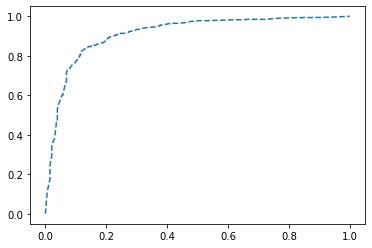

In [367]:
from matplotlib import pyplot
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, y_prob[:,1])
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Morgan')

## MACCS

In [360]:
maccs_active = []
maccs_inactive = []

for smile in smiles_active: 
    molecule = Chem.MolFromSmiles(smile)
    maccs_active.append(MACCSkeys.GenMACCSKeys(molecule))

for smile in smiles_inactive:
    molecule = Chem.MolFromSmiles(smile)
    maccs_inactive.append(MACCSkeys.GenMACCSKeys(molecule))
    
mps = maccs_active + maccs_inactive

In [361]:
maccs_X_train, maccs_X_test, maccs_y_train, maccs_y_test = train_test_split(mps, y, test_size=0.20)

In [428]:
forest = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_features=100)
forest.fit(maccs_X_train, maccs_y_train) # Build a forest of trees from the training set 

RandomForestClassifier(max_features=100, n_jobs=-1)

In [429]:
maccs_y_pred = forest.predict(maccs_X_test) # Predict class for X
maccs_y_prob = forest.predict_proba(maccs_X_test) # Predict probabilites
maccs_accuracy = metrics.accuracy_score(maccs_y_test, maccs_y_pred)
maccs_roc_auc = metrics.roc_auc_score(maccs_y_test, maccs_y_prob[:,1])  
print(f"Accuracy: {maccs_accuracy:.2f} \t AUC: {maccs_roc_auc:.2f}")

Accuracy: 0.82 	 AUC: 0.89


In [364]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[264  68]
 [ 50 400]]
Accuracy :  0.8491048593350383
Sensitivity :  0.7951807228915663
Specificity :  0.8888888888888888


In [365]:
cm2 = confusion_matrix(maccs_y_test,maccs_y_pred)
print('Confusion Matrix : \n', cm2)

total2=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

Confusion Matrix : 
 [[277  71]
 [ 76 358]]
Accuracy :  0.8120204603580563
Sensitivity :  0.7959770114942529
Specificity :  0.8248847926267281


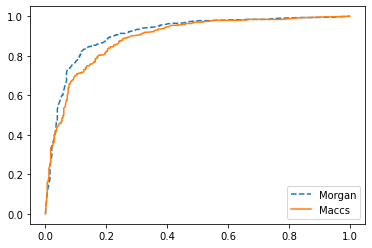

In [370]:
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, y_prob[:,1])
maccs_ns_fpr, maccs_ns_tpr, _ = metrics.roc_curve(maccs_y_test, maccs_y_prob[:,1])
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Morgan')
pyplot.plot(maccs_ns_fpr, maccs_ns_tpr, linestyle='-', label='Maccs')
pyplot.legend()

## Support vector machines

### Morgan

In [376]:
from sklearn import svm
svm_classifier = svm.SVC(probability=True)
svm_classifier.fit(X_train, y_train)


SVC(probability=True)

In [377]:
y_pred = svm_classifier.predict(X_test) # Predict class for X
y_prob = svm_classifier.predict_proba(X_test) # Predict probabilites
accuracy = metrics.accuracy_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_prob[:,1])  
print(f"Accuracy: {accuracy:.2f} \t AUC: {roc_auc:.2f}")

Accuracy: 0.85 	 AUC: 0.91


In [378]:
svm_classifier.fit(maccs_X_train, maccs_y_train)

SVC(probability=True)

In [379]:
maccs_y_pred = svm_classifier.predict(maccs_X_test) # Predict class for X
maccs_y_prob = svm_classifier.predict_proba(maccs_X_test) # Predict probabilites
maccs_accuracy = metrics.accuracy_score(maccs_y_test, maccs_y_pred)
maccs_roc_auc = metrics.roc_auc_score(maccs_y_test, maccs_y_prob[:,1])  
print(f"Accuracy: {maccs_accuracy:.2f} \t AUC: {maccs_roc_auc:.2f}")

Accuracy: 0.83 	 AUC: 0.87


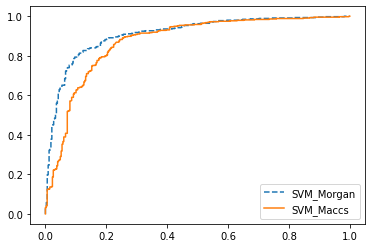

In [380]:
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, y_prob[:,1])
maccs_ns_fpr, maccs_ns_tpr, _ = metrics.roc_curve(maccs_y_test, maccs_y_prob[:,1])
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='SVM_Morgan')
pyplot.plot(maccs_ns_fpr, maccs_ns_tpr, linestyle='-', label='SVM_Maccs')
pyplot.legend()

In [382]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [408]:
# train_df = pd.DataFrame (fps,columns=['molecule'])
target_df = pd.DataFrame (y,columns=['target'])

In [412]:
target_df.head()

,target
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [418]:
train_df['target'] = y

In [549]:
y_y = deepcopy(y)

In [419]:
train_df.head()

,molecule,target
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",1.0
2,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",1.0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1.0
4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",1.0


In [578]:
import numpy as np
fold_no = 1
model = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_features=100)
accuracies = []
AUCs = []
sensitivities = []
specificities = []
for train_index, test_index in skf.split(train_df, y):
    train = train_df.loc[train_index,:]
    mols = train['molecule'].tolist()
    efficacy = train['target'].tolist()
    test = train_df.loc[test_index,:]
    test_mols = test['molecule'].tolist()
    test_values = test['target'].tolist()
    model.fit(mols, efficacy)
    predictions = model.predict(test_mols)
    print('Fold',str(fold_no),'Accuracy:',metrics.accuracy_score(test_values,predictions))
    accuracies.append(metrics.accuracy_score(test_values,predictions))
    y_prob = model.predict_proba(test_mols) # Predict probabilites
    AUCs.append(metrics.roc_auc_score(test_values, y_prob[:,1]))
    print('AUC : ', metrics.roc_auc_score(test_values, y_prob[:,1]))
    cm1 = confusion_matrix(test_values, predictions)
    total1=sum(sum(cm1))
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivities.append(sensitivity1)
    print('Sensitivity : ', sensitivity1 )
    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Specificity : ', specificity1)
    specificities.append(specificity1)
    fold_no += 1

Fold 1 Accuracy: 0.8631713554987213
AUC :  0.9243892207195509
Sensitivity :  0.8584070796460177
Specificity :  0.8668171557562077
Fold 2 Accuracy: 0.8553137003841229
AUC :  0.9183051277598943
Sensitivity :  0.8076923076923077
Specificity :  0.891647855530474
Fold 3 Accuracy: 0.852752880921895
AUC :  0.9200014692721762
Sensitivity :  0.7928994082840237
Specificity :  0.8984198645598194
Fold 4 Accuracy: 0.8591549295774648
AUC :  0.9178409713224784
Sensitivity :  0.8106508875739645
Specificity :  0.8961625282167043
Fold 5 Accuracy: 0.8719590268886044
AUC :  0.9216720725049721
Sensitivity :  0.8200589970501475
Specificity :  0.9117647058823529


In [584]:
import statistics
def get_average_std(numbers):
    mean = sum(numbers)/len(numbers)
    std = statistics.stdev(numbers)
    return f'The mean is: {mean} and the standard deviation is {std}' 

In [585]:
get_average_std(accuracies)

'The mean is: 0.8604703786541616 and the standard deviation is 0.007536010590345927'

In [569]:
import numpy as np
fold_no = 1
model1 = svm.SVC(probability=True)
for train_index, test_index in skf.split(train_df, y):
    train = train_df.loc[train_index,:]
    mols = train['molecule'].tolist()
    efficacy = train['target'].tolist()
    test = train_df.loc[test_index,:]
    test_mols = test['molecule'].tolist()
    test_preds = test['target'].tolist()
    
    model1.fit(mols, efficacy)
    predictions = model1.predict(test_mols)
    print('Fold',str(fold_no),'Accuracy:',metrics.accuracy_score(test_preds,predictions))
#     train_model(train, test, fold_no, 'forest')
    fold_no += 1

Fold 1 Accuracy: 0.850383631713555
Fold 2 Accuracy: 0.8553137003841229
Fold 3 Accuracy: 0.8514724711907811
Fold 4 Accuracy: 0.8604353393085787
Fold 5 Accuracy: 0.8732394366197183


In [ ]:
for train_index, test_index in skf.split(train_df, y):
    print(train_index)
    print(test_index)

In [393]:
fold_no = 1
for train_index, test_index in skf.split(train_df, y):
    train = train_df.loc[train_index,:]
    test = train_df.loc[test_index,:]
    #print('Fold',str(fold_no),'Class Ratio:',sum(test_df['test'])/len(test['train']))
    forest.fit(train,test)
    y_pred = forest.predict(test)
    accuracy = metrics.accuracy_score(test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_prob[:,1])
    print()
    fold_no += 1

ValueError: setting an array element with a sequence.

In [435]:
test_compounds_df = pd.read_csv("../data/test_compounds_EGFR.csv")
test_compounds_df.head()

,Unnamed: 0,chembl_id,canonical_smiles
0,1927,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c4ccccc24)cc1
1,212,CHEMBL107472,CNc1ncc2C=C(C(=O)N(C)c2n1)c3c(Cl)cccc3Cl
2,3089,CHEMBL1077068,CC1=C(C(NC(=N1)Nc2ccc(cc2)S(=O)(=O)Nc3ncccn3)c...
3,3126,CHEMBL1088240,COc1cc(Nc2c(cnc3cc(\C=C\CCN4CCN(C)CC4)c(OC)cc2...
4,3125,CHEMBL1092382,CCC(=O)Nc1ccc2nccc(Nc3cccc(Br)c3)c2c1


In [436]:
test_compounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1051 non-null   int64 
 1   chembl_id         1051 non-null   object
 2   canonical_smiles  1051 non-null   object
dtypes: int64(1), object(2)
memory usage: 24.8+ KB


In [437]:
smiles_test_compounds = test_compounds_df["canonical_smiles"].tolist()

In [438]:
len(smiles_test_compounds)

1051

In [445]:
fingerprints_test_compund = []
for smile in smiles_test_compounds:
    molecule = Chem.MolFromSmiles(smile)
    fingerprints_test_compund.append(AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=167))
test_compounds_fps = fingerprints_test_compund

In [446]:
len(fingerprints_test_compund)

1051

In [447]:
pred_pIC50 = forest.predict(test_compounds_fps)

In [449]:
test_compounds_df['effectiveness'] = pred_pIC50

In [451]:
test_compunds_filtered = deepcopy(test_compounds_df)

In [452]:
test_compunds_filtered.head()

,Unnamed: 0,chembl_id,canonical_smiles,effectiveness
0,1927,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c4ccccc24)cc1,0.0
1,212,CHEMBL107472,CNc1ncc2C=C(C(=O)N(C)c2n1)c3c(Cl)cccc3Cl,0.0
2,3089,CHEMBL1077068,CC1=C(C(NC(=N1)Nc2ccc(cc2)S(=O)(=O)Nc3ncccn3)c...,0.0
3,3126,CHEMBL1088240,COc1cc(Nc2c(cnc3cc(\C=C\CCN4CCN(C)CC4)c(OC)cc2...,1.0
4,3125,CHEMBL1092382,CCC(=O)Nc1ccc2nccc(Nc3cccc(Br)c3)c2c1,0.0


In [454]:
cols2 = ['Unnamed: 0', 'chembl_id', 'canonical_smiles', 'effectiveness']

In [456]:
test_compunds_filtered[cols2] = test_compunds_filtered[test_compunds_filtered['effectiveness'] > 0.0]
test_compunds_filtered = test_compunds_filtered.dropna()

In [457]:
test_compunds_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 3 to 990
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        146 non-null    float64
 1   chembl_id         146 non-null    object 
 2   canonical_smiles  146 non-null    object 
 3   effectiveness     146 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.7+ KB


descriptors code

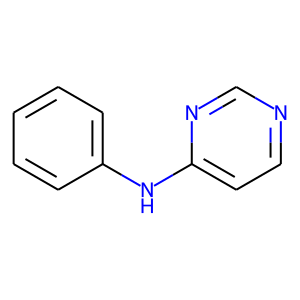

In [484]:
substructure_query = Chem.MolFromSmiles("c1c(Nc2ccccc2)ncnc1")
Chem.Draw.MolToImage(substructure_query)

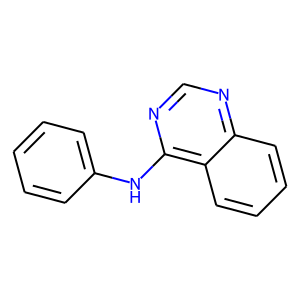

In [3]:
substructure_query = Chem.MolFromSmiles("C12=NC=NC(=C1C=CC=C2)NC3=CC=CC=C3")
Chem.Draw.MolToImage(substructure_query)

In [485]:
filtered_smiles = test_compunds_filtered['canonical_smiles'].tolist()

In [486]:
ml_filtered_mols = []
for smile in filtered_smiles:
    molecule = Chem.MolFromSmiles(smile)
    ml_filtered_mols.append(molecule)

In [487]:
len(ml_filtered_mols)

146

In [488]:

submolecules = [molecule for molecule in ml_filtered_mols if molecule.HasSubstructMatch(substructure_query)]
print(len(submolecules), "matches out of", len(ml_filtered_mols))

77 matches out of 146


In [491]:
test_compunds_filtered['mols'] = ml_filtered_mols
test_compunds_filtered.head()

,Unnamed: 0,chembl_id,canonical_smiles,effectiveness,mols
3,3126.0,CHEMBL1088240,COc1cc(Nc2c(cnc3cc(\C=C\CCN4CCN(C)CC4)c(OC)cc2...,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb9895f4210>
29,3229.0,CHEMBL1172947,Cc1ncc([N+](=O)[O-])n1CCOC(=O)\C=C\c2ccccc2Br,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c46c0>
30,3233.0,CHEMBL1172951,Cc1ncc([N+](=O)[O-])n1CCOC(=O)\C=C\c2cccc(F)c2,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4080>
33,3234.0,CHEMBL1173014,COc1cccc(\C=C\C(=O)OCCn2c(C)ncc2[N+](=O)[O-])c1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c40d0>
41,3222.0,CHEMBL1173653,Cc1ccc(\C=C\C(=O)OCCn2c(C)ncc2[N+](=O)[O-])cc1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4120>


In [492]:
cols3 = ['Unnamed: 0', 'chembl_id', 'canonical_smiles', 'effectiveness', 'mols']

In [493]:
trial = deepcopy(test_compunds_filtered)

In [496]:
g = pd.DataFrame()
for i in range(77):
    g = g.append(trial[trial['mols'] == submolecules[i]])

In [509]:
g

,Unnamed: 0,chembl_id,canonical_smiles,effectiveness,mols
52,3244.0,CHEMBL1221700,CC(C)(C)c1ccc(Nc2ncnc3ccc(NC(=O)C=C)cc23)cc1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4170>
84,3440.0,CHEMBL1254523,COc1ccc(OC)c(Cc2cc3c(nc(N)nc3n2C)N(C)c4cccc(Br...,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4210>
100,163.0,CHEMBL136178,CC(=O)\C=C\C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c42b0>
105,30.0,CHEMBL138125,Brc1cccc(Nc2ncnc3ccc(N\N=N\Cc4ccccn4)cc23)c1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4300>
149,3552.0,CHEMBL1761929,COC(=O)Nc1ccc(Nc2ncnc3cc(OC)c(OC)cc23)cc1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c43a0>
...,...,...,...,...,...
921,2746.0,CHEMBL513716,NS(=O)(=O)c1ccc(Nc2nc3ncnc(Nc4c(F)cccc4F)c3s2)cc1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98652a440>
922,2786.0,CHEMBL514938,Fc1cccc(COc2ccc(Nc3ncnc4sc(cc34)c5occc5)cc2Cl)c1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98652a620>
928,2750.0,CHEMBL523122,COCCOc1cc2ncnc(Nc3c(Cl)ccc4OCOc34)c2cc1NC(=O)[...,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98652a3a0>
938,1168.0,CHEMBL53203,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(Oc4ccccc4)cc3)c2c1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98652ac10>


In [512]:
smiles_ahmed_code = g['canonical_smiles'].tolist()
smiles_ahmed_code

['CC(C)(C)c1ccc(Nc2ncnc3ccc(NC(=O)C=C)cc23)cc1',
 'COc1ccc(OC)c(Cc2cc3c(nc(N)nc3n2C)N(C)c4cccc(Br)c4)c1',
 'CC(=O)\\C=C\\C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1',
 'Brc1cccc(Nc2ncnc3ccc(N\\N=N\\Cc4ccccn4)cc23)c1',
 'COC(=O)Nc1ccc(Nc2ncnc3cc(OC)c(OC)cc23)cc1',
 'COc1cc(ccc1Nc2ncc3CN(C(=O)N(c4cccc(NC(=O)C=C)c4)c3n2)c5ccc6ccccc6c5)N7CCN(C)CC7',
 'COc1cc(ccc1Nc2ncc3CN(C)C(=O)N(c4cccc(NC(=O)C=C)c4)c3n2)N5CCN(C)CC5',
 'COc1cc(ccc1Nc2ncc3CN(C)C(=O)N(c4cccc(NC(=O)C=C)c4)c3n2)N5CCOCC5',
 'Brc1cccc(Nc2ncnc3ccc(NCc4ccc5OCCCOc5c4)cc23)c1',
 'COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN(C)C4(CCN(C)CC4)C(=O)N',
 'COCC[C@H](N(C)Cc1cc2c(Nc3cccc(Cl)c3F)ncnc2cc1OC)C(=O)N',
 'Fc1ccc(Nc2ncnc3cc(OCCCN4CCOCC4)c(NC(=O)C=C)cc23)cc1Br',
 'OCc1ccc(cc1)c2cc3ncnc(Nc4ccc5[nH]ccc5c4)c3s2',
 'COc1cc(Nc2ncnc3ccc(NC(=O)C=C)cc23)ccc1Br',
 'CCc1cccc(Nc2ncnc3ccc(NC(=O)C=C)cc23)c1',
 'CCc1ccc(Nc2ncnc3ccc(NC(=O)C=C)cc23)cc1',
 'CN(C)CCOc1ccc(Nc2ncnc3ccc(NC(=O)C=C)cc23)cc1Br',
 'Nc1ccccc1NC(=O)c2ccc(COc3ccc4ncnc(Nc5cccc(c5)C#C)c4c3)cc2',

In [517]:
def descriptors(smile):
    """ 
       function to calculate some of descriptors to molecules
        input : smile of the molecule 
        output:  data frame of one vector with the smile or the name of compound and descriptors 
         Mol Weight , number of Hydrogen  acceptor and donor and logP"
    """
    #get the info about the molecule related to the smile if present from the dataframe
    compound = smile
#     if len(compound) != 0:
#         compoundname = compound.iloc[0,0]
    
    # list of the descriptor needed to calculate 
    descriptorlist = ['MOLWT','HB acceptor' , 'HB donor' , 'logp']
    
    for descript in descriptorlist:
        if descript == "MOLWT":
            # calculate the molecular weight 
            MOLWT = Descriptors.ExactMolWt(Chem.MolFromSmiles(smile)) 

        elif descript == 'HB acceptor':
            # calculate the number of hydrogen bond acceptor 
            HB_acceptor = Descriptors.NumHAcceptors(Chem.MolFromSmiles(smile))

        elif descript == 'HB donor':
            # calculate the number of hydrogen bond donor 
            HB_donor = Descriptors.NumHDonors(Chem.MolFromSmiles(smile))
                    
        elif descript == 'logp':
            # calculate the logp 
            logp = Descriptors.MolLogP(Chem.MolFromSmiles(smile))
    
    # checking if the name compound present to add to the dataframe  
    if len(compound) != 0: 
            comp_desc = {'MOLWT':MOLWT  ,'HB_acceptor': HB_acceptor ,  
                         'HB_donor': HB_donor,'logp' : logp}
    # if the name of compound not present , add the smile as it is 
    else: 
            comp_desc = {'smiles': smile , 'MOLWT':MOLWT  ,'HB_acceptor': HB_acceptor ,  
                        'HB_donor': HB_donor,'logp' : logp}
            
    df_comp_desc = pd.DataFrame.from_dict(comp_desc,orient='index').transpose()
                
              
    return df_comp_desc

In [518]:
descriptor_allmolecules = pd.DataFrame()
for smile in smiles_ahmed_code:
    descript_onemolc = descriptors(smile)
    descriptor_allmolecules = descriptor_allmolecules.append(descript_onemolc, ignore_index = True)
descriptor_allmolecules

,MOLWT,HB_acceptor,HB_donor,logp
0,346.179361,4.0,2.0,4.7954
1,481.111337,7.0,1.0,4.6889
2,410.037838,5.0,2.0,4.2196
3,433.065056,6.0,2.0,5.5102
4,354.132805,7.0,2.0,3.5689
...,...,...,...,...
72,434.043122,8.0,3.0,3.4991
73,451.055754,6.0,1.0,7.0664
74,485.146597,9.0,3.0,3.4712
75,382.142976,5.0,2.0,5.2902


In [527]:
def checkLipinskis_rule(smile):
    """ 
    check the Lipinskis rules to molcules 
    No more than 5 hydrogen bond donors
    No more than 10 hydrogen bond acceptors
    A molecular mass < 500 Daltons
    An octanol-water partition coefficient logP < 5
    
    input : smile of the molcule 
    output : the name of molecule and how nmany fulfil the rule
    
    """
    violatescore = 0
    # calculate the descriptors 
    descriptor = descriptors(smile)
#     compound = antiEGFR.loc[antiEGFR.Smiles == smile].iloc[0,0]
    
    # violaterule to add the missing properites of the rule 
    violaterule = []
    
    # checking that Mol weight not more 500 Dalt
    if descriptor['MOLWT'][0] > 500 :
        violatescore += 1 
        violaterule.append('MOLWT')
        
    # checking that number of hydrogen acceptors not more 10  
    if descriptor['HB_acceptor'][0] > 10 :
        violatescore += 1 
        violaterule.append('HB_acceptor')
        
    # checking that  number of hydrogen donor groups not more 5
    if descriptor['HB_donor'][0] > 5 :
        violatescore += 1
        violaterule.append('HB_donor')
    
    # checking that logp not more 5
    if descriptor['logp'][0] > 5 :
        violatescore += 1
        violaterule.append('logp')
    
    # add Nothing if there is no missing part in the rule 
    return violatescore

In [528]:
checklipinskisfor_molecules = [checkLipinskis_rule(smile) for smile in smiles_ahmed_code]

In [531]:
g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 52 to 989
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        77 non-null     float64
 1   chembl_id         77 non-null     object 
 2   canonical_smiles  77 non-null     object 
 3   effectiveness     77 non-null     float64
 4   mols              77 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.6+ KB


In [532]:
g['lip_rule_check'] = checklipinskisfor_molecules

In [543]:
data_filtered_ML_lip = deepcopy(g)

In [544]:
col_names_ahmed = ['Unnamed: 0', 'chembl_id',
                   'canonical_smiles', 'effectiveness', 'mols', 'lip_rule_check']

In [545]:
data_filtered_ML_lip[col_names_ahmed] = data_filtered_ML_lip[data_filtered_ML_lip['lip_rule_check'] < 2]

In [546]:
data_filtered_ML_lip = data_filtered_ML_lip.dropna()
data_filtered_ML_lip.head()

,Unnamed: 0,chembl_id,canonical_smiles,effectiveness,mols,lip_rule_check
52,3244.0,CHEMBL1221700,CC(C)(C)c1ccc(Nc2ncnc3ccc(NC(=O)C=C)cc23)cc1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4170>,0.0
84,3440.0,CHEMBL1254523,COc1ccc(OC)c(Cc2cc3c(nc(N)nc3n2C)N(C)c4cccc(Br...,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4210>,0.0
100,163.0,CHEMBL136178,CC(=O)\C=C\C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c42b0>,0.0
105,30.0,CHEMBL138125,Brc1cccc(Nc2ncnc3ccc(N\N=N\Cc4ccccn4)cc23)c1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4300>,1.0
149,3552.0,CHEMBL1761929,COC(=O)Nc1ccc(Nc2ncnc3cc(OC)c(OC)cc23)cc1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c43a0>,0.0


In [547]:
data_filtered_ML_lip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 52 to 938
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        55 non-null     float64
 1   chembl_id         55 non-null     object 
 2   canonical_smiles  55 non-null     object 
 3   effectiveness     55 non-null     float64
 4   mols              55 non-null     object 
 5   lip_rule_check    55 non-null     float64
dtypes: float64(3), object(3)
memory usage: 3.0+ KB


In [548]:
data_filtered_ML_lip[0:]

,Unnamed: 0,chembl_id,canonical_smiles,effectiveness,mols,lip_rule_check
52,3244.0,CHEMBL1221700,CC(C)(C)c1ccc(Nc2ncnc3ccc(NC(=O)C=C)cc23)cc1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4170>,0.0
84,3440.0,CHEMBL1254523,COc1ccc(OC)c(Cc2cc3c(nc(N)nc3n2C)N(C)c4cccc(Br...,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4210>,0.0
100,163.0,CHEMBL136178,CC(=O)\C=C\C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c42b0>,0.0
105,30.0,CHEMBL138125,Brc1cccc(Nc2ncnc3ccc(N\N=N\Cc4ccccn4)cc23)c1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4300>,1.0
149,3552.0,CHEMBL1761929,COC(=O)Nc1ccc(Nc2ncnc3cc(OC)c(OC)cc23)cc1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c43a0>,0.0
257,4070.0,CHEMBL2032376,COc1cc(ccc1Nc2ncc3CN(C)C(=O)N(c4cccc(NC(=O)C=C...,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4580>,1.0
258,4073.0,CHEMBL2032379,COc1cc(ccc1Nc2ncc3CN(C)C(=O)N(c4cccc(NC(=O)C=C...,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c45d0>,1.0
278,4205.0,CHEMBL2070198,Brc1cccc(Nc2ncnc3ccc(NCc4ccc5OCCCOc5c4)cc23)c1,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4620>,1.0
280,1798.0,CHEMBL207130,COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN(C)C4(CCN(C)...,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4670>,0.0
281,1800.0,CHEMBL207445,COCC[C@H](N(C)Cc1cc2c(Nc3cccc(Cl)c3F)ncnc2cc1O...,1.0,<rdkit.Chem.rdchem.Mol object at 0x7fb98b0c4710>,0.0
